## Prediction FTR LaLiga

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

In [2]:
train=pd.read_csv("datasets/laliga_data_train_onehot.csv")
test=pd.read_csv("datasets/laliga_data_test_onehot.csv")
# print(train.head())
# print(train.shape)

In [3]:
X_train = train.drop(columns = ['FTR'])
y_train = train['FTR']
print(X_train.shape)
print(y_train.shape)

(2660, 29)
(2660,)


In [4]:
X_test = test.drop(columns = ['FTR'])
y_test = test['FTR']
print(X_test.shape)
print(y_test.shape)

(380, 29)
(380,)


In [5]:
columns = X_train.shape[1]
columns

29

In [6]:
# 41-75-3
# We first need to define the sequence of dependencies (the computational graph)
# x = Input(shape=(20,32))
x = Input(shape=(columns,))
# h = Conv2D(32, (7, 7), strides=(2, 2))(x)
# h = Activation('relu')(x)
h = Flatten()(x)
h = Dense(41)(h)
h = Dense(75)(h)
# for i in range(10):
#     h = Dense(75)(h)
h = Dropout(0.3)(h)
p = Activation('softmax')(h)

# Now that we have defined how to find p from x, we can create a 
# model simply by saying what is input and what is output
model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
flatten (Flatten)            (None, 29)                0         
_________________________________________________________________
dense (Dense)                (None, 41)                1230      
_________________________________________________________________
dense_1 (Dense)              (None, 75)                3150      
_________________________________________________________________
dropout (Dropout)            (None, 75)                0         
_________________________________________________________________
activation (Activation)      (None, 75)                0         
Total params: 4,380
Trainable params: 4,380
Non-trainable params: 0
___________________________________________________________

In [7]:
history = model.fit(X_train, y_train, batch_size=16, epochs=200, validation_split=0.04)

Epoch 1/200
160/160 [==============================] - 1s 5ms/step - loss: 6.8172 - accuracy: 0.0012 - val_loss: 5.9268 - val_accuracy: 0.0093
Epoch 2/200
160/160 [==============================] - 1s 3ms/step - loss: 6.5946 - accuracy: 0.0012 - val_loss: 5.7555 - val_accuracy: 0.0093
Epoch 3/200
160/160 [==============================] - 0s 3ms/step - loss: 6.3647 - accuracy: 0.0020 - val_loss: 5.5884 - val_accuracy: 0.0093
Epoch 4/200
160/160 [==============================] - 0s 3ms/step - loss: 6.1594 - accuracy: 0.0016 - val_loss: 5.4214 - val_accuracy: 0.0093
Epoch 5/200
160/160 [==============================] - 0s 3ms/step - loss: 5.9689 - accuracy: 0.0024 - val_loss: 5.2563 - val_accuracy: 0.0093
Epoch 6/200
160/160 [==============================] - 1s 3ms/step - loss: 5.7483 - accuracy: 0.0051 - val_loss: 5.0957 - val_accuracy: 0.0093
Epoch 7/200
160/160 [==============================] - 1s 4ms/step - loss: 5.5518 - accuracy: 0.0047 - val_loss: 4.9370 - val_accuracy: 0.0093

Epoch 58/200
160/160 [==============================] - 1s 3ms/step - loss: 2.1364 - accuracy: 0.4203 - val_loss: 1.4750 - val_accuracy: 0.4860
Epoch 59/200
160/160 [==============================] - 0s 3ms/step - loss: 2.0577 - accuracy: 0.4371 - val_loss: 1.4617 - val_accuracy: 0.4860
Epoch 60/200
160/160 [==============================] - 0s 3ms/step - loss: 2.1341 - accuracy: 0.4238 - val_loss: 1.4521 - val_accuracy: 0.4860
Epoch 61/200
160/160 [==============================] - 0s 3ms/step - loss: 2.1205 - accuracy: 0.4332 - val_loss: 1.4416 - val_accuracy: 0.4860
Epoch 62/200
160/160 [==============================] - 0s 3ms/step - loss: 2.1007 - accuracy: 0.4383 - val_loss: 1.4317 - val_accuracy: 0.4860
Epoch 63/200
160/160 [==============================] - 1s 3ms/step - loss: 2.0901 - accuracy: 0.4328 - val_loss: 1.4190 - val_accuracy: 0.4860
Epoch 64/200
160/160 [==============================] - 0s 3ms/step - loss: 2.0614 - accuracy: 0.4379 - val_loss: 1.4098 - val_accuracy:

Epoch 115/200
160/160 [==============================] - 1s 4ms/step - loss: 1.9826 - accuracy: 0.4465 - val_loss: 1.1122 - val_accuracy: 0.4673
Epoch 116/200
160/160 [==============================] - 0s 3ms/step - loss: 1.9449 - accuracy: 0.4418 - val_loss: 1.1083 - val_accuracy: 0.4579
Epoch 117/200
160/160 [==============================] - 0s 3ms/step - loss: 1.9507 - accuracy: 0.4508 - val_loss: 1.1051 - val_accuracy: 0.4673
Epoch 118/200
160/160 [==============================] - 0s 3ms/step - loss: 1.9906 - accuracy: 0.4516 - val_loss: 1.1024 - val_accuracy: 0.4673
Epoch 119/200
160/160 [==============================] - 1s 3ms/step - loss: 1.9615 - accuracy: 0.4481 - val_loss: 1.0998 - val_accuracy: 0.4673
Epoch 120/200
160/160 [==============================] - 0s 3ms/step - loss: 1.9706 - accuracy: 0.4454 - val_loss: 1.0977 - val_accuracy: 0.4673
Epoch 121/200
160/160 [==============================] - 0s 3ms/step - loss: 1.9570 - accuracy: 0.4524 - val_loss: 1.0946 - val_ac

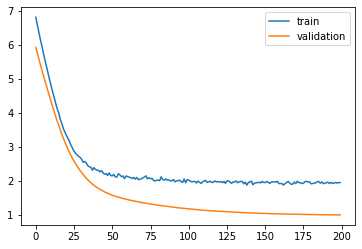

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

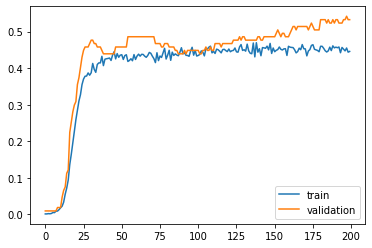

In [9]:
# plt.plot(history.history['acc'], label='train')
# plt.plot(history.history['val_acc'], label='validation')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [10]:
test_predictions = np.argmax(model.predict(X_test), axis=1)
accuracy = (test_predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set accuracy:", accuracy)

Test set accuracy: 0.5368421052631579


In [11]:
from sklearn.metrics import confusion_matrix
print("Y train")
print("Unique train labels:", np.unique(y_train.values))
print("Away win count:", (y_train==0).sum())
print("Draw count:", (y_train==1).sum())
print("Away win count:", (y_train==2).sum())

Y train
Unique train labels: [0 1 2]
Away win count: 738
Draw count: 621
Away win count: 1301


In [12]:
print("Train Prediction")
train_predictions = np.argmax(model.predict(X_train), axis=1)
print("Unique train labels:", np.unique(train_predictions))
print("Away win count:", (y_train==0).sum())
print("Draw count:", (y_train==1).sum())
print("Home win count:", (y_train==2).sum())

Train Prediction
Unique train labels: [0 1 2]
Away win count: 738
Draw count: 621
Home win count: 1301


In [13]:
# Train
df_conf_matrix = pd.DataFrame(confusion_matrix(y_train, train_predictions, labels=[0, 1, 2]), 
             index=['true home', 'true draw', 'true away'], columns=['pred home', 'pred draw', 'pred away'])
print("Train Data")
df_conf_matrix

Train Data


,pred home,pred draw,pred away
true home,342,12,384
true draw,175,25,421
true away,184,42,1075


In [14]:
# Test
df_conf_matrix = pd.DataFrame(confusion_matrix(y_test, test_predictions, labels=[0, 1, 2]), 
             index=['true home', 'true draw', 'true away'], columns=['pred home', 'pred draw', 'pred away'])
print("Test Data")
df_conf_matrix

Test Data


,pred home,pred draw,pred away
true home,48,7,58
true draw,24,1,58
true away,28,1,155


## Stupid models

####  accumulation history goal

In [15]:
def get_accuracy(test_preidction, y_test):
    return (test_predictions == y_test.values).sum() / y_test.values.shape[0]

def goal_score_history(X_test):
    my_pred_h =  2*(X_test['HTGS'] > X_test['ATGS'])
    my_pred_a =  0*(X_test['HTGS'] < X_test['ATGS'])
    my_pred_d =  1*(X_test['HTGS'] == X_test['ATGS'])
    my_pred = my_pred_h + my_pred_a + my_pred_d
    return my_pred

# print(X_test.loc[10,:])
# print(list(pred_on_gs(X_test)))
# print(y_test)
# print(ftrLE.inverse_transform(pred_on_gs(X_test)))
test_predictions = list(goal_score_history(X_test))
print("Test set accuracy goal_score_history:", get_accuracy(test_predictions,y_test))

Test set accuracy goal_score_history: 0.4605263157894737


#### always home, away, draw

In [16]:
def home_always_win(X_test):
    return [2] * X_test.shape[0]

def away_always_win(X_test):
    return [0] * X_test.shape[0]

def always_draw(X_test):
    return [1] * X_test.shape[0]


test_predictions = list(home_always_win(X_test))
print("Test set accuracy home_always_win:", get_accuracy(test_predictions,y_test))

test_predictions = list(away_always_win(X_test))
print("Test set accuracy away_always_win:", get_accuracy(test_predictions,y_test))

test_predictions = list(always_draw(X_test))
print("Test set accuracy always_draw:", get_accuracy(test_predictions,y_test))

Test set accuracy home_always_win: 0.4842105263157895
Test set accuracy away_always_win: 0.29736842105263156
Test set accuracy always_draw: 0.21842105263157896


#### 

In [17]:
def random_distribution_to_the_train(X_train,y_train,X_test):
    distribution = [len(y_train[y_train == 0]),len(y_train[y_train == 1]),len(y_train[y_train == 2])]
    distribution = np.array(distribution)/sum(distribution)
    result = []
    for i in range(len(X_test)):
        result.append(np.random.choice([0,1,2], p=distribution))
    return np.array(result)


result = random_distribution_to_the_train(X_train,y_train,X_test)

test_predictions = list(random_distribution_to_the_train(X_train,y_train,X_test))
print("Test set accuracy random_distribution_to_the_train:", get_accuracy(test_predictions,y_test))

Test set accuracy random_distribution_to_the_train: 0.43157894736842106


## Betting odds in favor strategy

In [10]:
dataLaliga =pd.read_csv("datasets/LaLiga_sort.csv")
columns = ['B365H','B365D','B365A']
X = dataLaliga[columns]
Y = dataLaliga.Result
y_true = Y.tolist()
y_true[0]

'H'

In [11]:
def bet(odds, strategy):
    predict = None
    if strategy == 'favor':
        target_odd = odds.idxmin()
        odd = odds.min()
    elif strategy == 'against':
        target_odd = odds.idxmax()
        odd = odds.max()
    if target_odd == 'B365H':
        predict = 'H'
    elif target_odd =='B365D':
        predict = 'D'
    else:
        predict = 'A'
    return predict, odd   

In [12]:
y_pred =[]
money = 1000
for i in range(len(X)):
    money = money - 10
    pred, odd = bet(X.loc[i],'favor')
    y_pred.append(pred)
    if(pred == y_true[i]):
        money += 10 * float(odd)

In [13]:
print("Accuracy = ", sum(1 for x,y in zip(y_pred,y_true) if x == y) / len(y_pred))

Accuracy =  0.5625


In [14]:
print("Final Money Balance", money)

Final Money Balance 530.5999999999975


### Betting Against Favor Odds  strategy

In [15]:
y_pred =[]
money = 1000
for i in range(len(X)):
    money = money - 10
    pred, odd = bet(X.loc[i],'against')
    y_pred.append(pred)
    if(pred == y_true[i]):
        money += 10 * float(odd)

In [16]:
print("Accuracy = ", sum(1 for x,y in zip(y_pred,y_true) if x == y) / len(y_pred))

Accuracy =  0.20230263157894737


In [17]:
print("Final Money Balance =", money)

Final Money Balance = -2093.6000000000004


## Random Forest - baseline model

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
## la liga
train=pd.read_csv("datasets/laliga_data_train_onehot.csv")
test=pd.read_csv("datasets/laliga_data_test_onehot.csv")

In [20]:
X_train = train.drop(columns = ['FTR'])
y_train = train['FTR']
print(X_train.shape)
print(y_train.shape)

(2660, 29)
(2660,)


In [21]:
featuresList = list(X_train.columns) 
targetList = ["0","1","2"]

In [22]:
X_test = test.drop(columns = ['FTR'])
y_test = test['FTR']
print(X_test.shape)
print(y_test.shape)

(380, 29)
(380,)


In [23]:
columns = X_train.shape[1]
columns

29

In [24]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 143, 147, 151, 155, 159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199, 203, 206, 210, 214, 218, 222, 226, 230, 234, 238, 242, 246, 250, 254, 258, 262, 266, 270, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309, 313, 317, 321, 325, 329, 333, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [25]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   24.3s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [26]:
rf_random.best_params_

{'n_estimators': 116,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 6,
 'bootstrap': False}

In [27]:
#best param
rf = RandomForestClassifier(n_estimators= 297,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 4,
 bootstrap= True)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

In [28]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5394736842105263


In [29]:
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree_laliga.dot', 
                feature_names = featuresList,
                class_names = targetList,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [30]:
from subprocess import call
call(['dot', '-Tpng', 'tree_laliga.dot', '-o', 'tree_laliga.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_laliga.png')

In [31]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(featuresList, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: ATGD                 Importance: 0.18
Variable: DiffLP               Importance: 0.17
Variable: HTGD                 Importance: 0.13
Variable: DiffPts              Importance: 0.1
Variable: ATP                  Importance: 0.09
Variable: ATGS                 Importance: 0.07
Variable: HTP                  Importance: 0.07
Variable: HTGS                 Importance: 0.04
Variable: DiffFormPts          Importance: 0.04
Variable: ATGC                 Importance: 0.02
Variable: HTGC                 Importance: 0.01
Variable: HM3                  Importance: 0.01
Variable: AM1                  Importance: 0.01
Variable: AM3                  Importance: 0.01
Variable: AM4                  Importance: 0.01
Variable: AM5                  Importance: 0.01
Variable: HTWinStreak3         Importance: 0.01
Variable: ATWinStreak3         Importance: 0.01
Variable: HM1                  Importance: 0.0
Variable: HM2                  Importance: 0.0
Variable: HM4                  Importance: 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

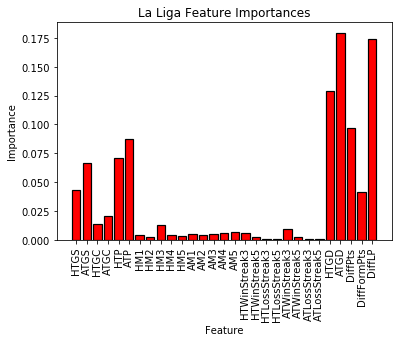

In [32]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, featuresList, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('La Liga Feature Importances');
